# Predictive Model for Flu Detection Using LSTM

## Project Goal

The goal of this project is to develop a predictive model that utilizes synthetic time series data to determine whether patients are likely to have the flu. The model will be built using Long Short-Term Memory (LSTM) networks, a type of Recurrent Neural Network (RNN) known for its ability to capture long-term dependencies in sequential data.

## Project Overview

This project involves creating a time series dataset with three primary features:
1. **Temperature**: The average daily temperature.
2. **Month**: The month of the year, capturing seasonal variations.
3. **Past Flu Occurrences**: The number of flu cases reported in the previous days.

These features will be used to predict the target variable: whether a patient has the flu or not. By leveraging LSTM networks, the model will learn patterns and relationships within the sequential data to make accurate predictions.

## Tools and Techniques

1. **Data Generation**:
   - Synthetic data will be created to simulate real-world conditions. This includes generating values for temperature, month, and past flu occurrences.

2. **Preprocessing**:
   - Features will be normalized and encoded to be suitable for input into the LSTM model.
   - Date and temperature data will be scaled, and categorical features like month will be converted into numerical representations.

3. **Modeling**:
   - **Long Short-Term Memory (LSTM)**: LSTM networks will be used due to their effectiveness in handling time series data with long-term dependencies.
   - **Libraries**: TensorFlow will be utilized to build and train the LSTM model.

## Feature Descriptions and Their Importance

1. **Temperature**:
   - **Importance**: Temperature plays a significant role in flu transmission and severity. Lower temperatures often correlate with higher flu incidence rates. By including temperature as a feature, the model can learn how fluctuations in temperature influence the likelihood of flu occurrence.

2. **Month**:
   - **Importance**: The month feature captures seasonal variations, which are crucial in understanding flu patterns. Flu season typically peaks in colder months. Including this feature allows the model to account for seasonal trends and make more accurate predictions based on the time of year.

3. **Past Flu Occurrences**:
   - **Importance**: Historical flu data provides context for current flu risks. If there have been several recent cases of flu, the likelihood of new cases may be higher. This feature helps the model to recognize patterns and trends based on recent flu occurrences, improving its predictive accuracy.

## Synopsis

By combining these features with LSTM networks, the project aims to build a robust predictive model that can effectively forecast flu occurrences. The insights gained from this model can be valuable in understanding and managing flu outbreaks and improving public health responses.


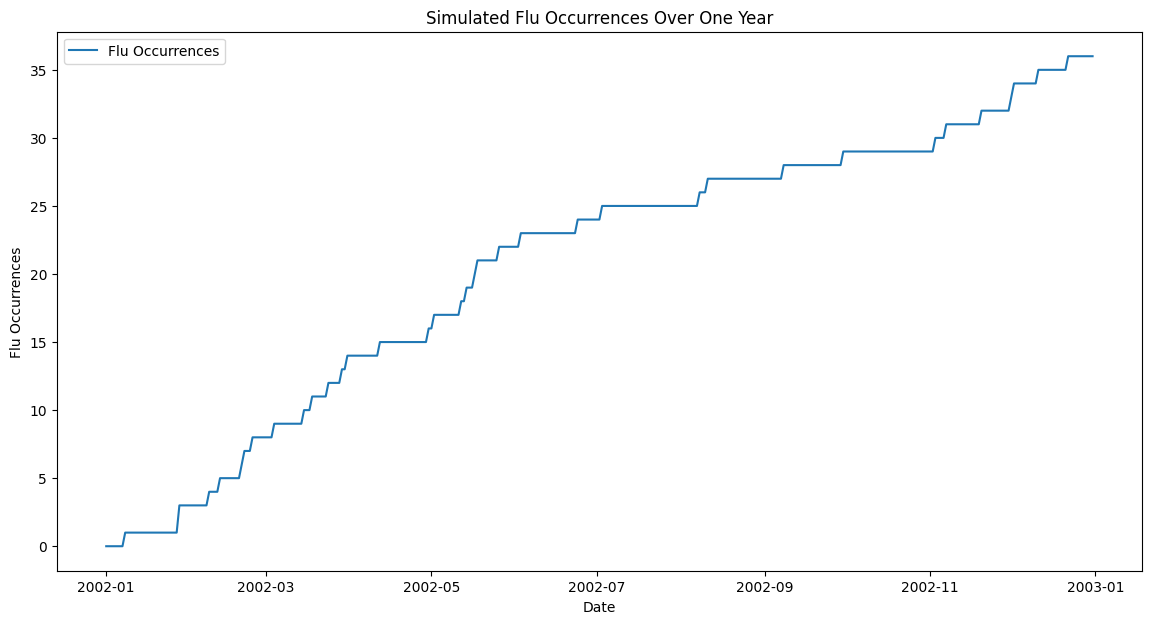

In [136]:
# Creating synthetic data for the project

import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Generating a list of dates for one year (2002)
start_date = datetime(2002, 1, 1)
end_date = datetime(2002, 12, 31)
date_range = [start_date + timedelta(days=x) for x in range(0, (end_date - start_date).days + 1)]

# Developing seasonal temperature with some noise
def generate_temperature(date):
    month = date.month
    base_temp = 30 - 10 * np.sin(np.pi * (month - 1) / 6)
    noise = np.random.normal(0, 5)  # Adding the noise
    return base_temp + noise

temperatures = [generate_temperature(date) for date in date_range] # Temperature feature created

months = [date.month for date in date_range] # Month feature created

def get_base_rate(month):
    # Higher flu rates in colder months
    if month in [12, 1, 2]:
        return 0.2
    elif month in [3, 4, 5]:
        return 0.1
    elif month in [6, 7, 8]:
        return 0.05
    else:
        return 0.1


def generate_flu_occurrences(n, temperatures, months):
    flu_occurrences = np.zeros(n)
    for i in range(1, n):
        # Apply base rate for flu occurrences based on the month
        base_rate = get_base_rate(months[i])
        # Temperature effect: colder temperatures might increase flu rates
        temp_effect = max(0,(30 - temperatures[i]) * 0.01)
        # Update the flu occurrences based on the previous value, and poisson(base rate, temperature effect)
        flu_occurrences[i] = flu_occurrences[i-1] + np.random.poisson(lam=base_rate + temp_effect)
    return flu_occurrences

past_flu_occurrences = generate_flu_occurrences(len(date_range), temperatures, months) # Flu occurrences feature created

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(date_range, past_flu_occurrences, label='Flu Occurrences')
plt.xlabel('Date')
plt.ylabel('Flu Occurrences')
plt.title('Simulated Flu Occurrences Over One Year')
plt.legend()
plt.show()


In [137]:
def determine_flu_status(temp, past_flu):
    # Simple rule for target variable: if temperature is below a threshold and past flu occurrences are above a threshold
    return int(temp < 23 and past_flu > 10)

flu_statuses = [determine_flu_status(temp, past_flu_occurrences[i]) for i, temp in enumerate(temperatures)]

data = pd.DataFrame({
    'Date': date_range,
    'Temperature': temperatures,
    'Month': months,
    'Past_Flu_Occurrences': past_flu_occurrences,
    'Flu_Status': flu_statuses
})

print(data.head())

flu1=[]
for i in flu_statuses:
    if i == 1:
        flu1.append(i)
print(f'\nTotal flus caught from clients: {len(flu1)}/{len(flu_statuses)}')

        Date  Temperature  Month  Past_Flu_Occurrences  Flu_Status
0 2002-01-01    20.092452      1                   0.0           0
1 2002-01-02    24.487996      1                   0.0           0
2 2002-01-03    35.514589      1                   0.0           0
3 2002-01-04    37.174284      1                   0.0           0
4 2002-01-05    29.935078      1                   0.0           0

Total flus caught from clients: 67/365


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6389 - loss: 0.6685 - val_accuracy: 0.8621 - val_loss: 0.5946
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8089 - loss: 0.5795 - val_accuracy: 0.8621 - val_loss: 0.4989
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8229 - loss: 0.4771 - val_accuracy: 0.8621 - val_loss: 0.3781
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8035 - loss: 0.3480 - val_accuracy: 0.8621 - val_loss: 0.2823
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8355 - loss: 0.2914 - val_accuracy: 0.8966 - val_loss: 0.2295
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8802 - loss: 0.2674 - val_accuracy: 0.9310 - val_loss: 0.2120
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8842 - loss: 0.2527 - val_accuracy: 0.9310 - val_loss: 0.2116
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8815 - loss: 0.2440 - val_accuracy: 0.9310 - val_loss: 0.2122
Epoch 9

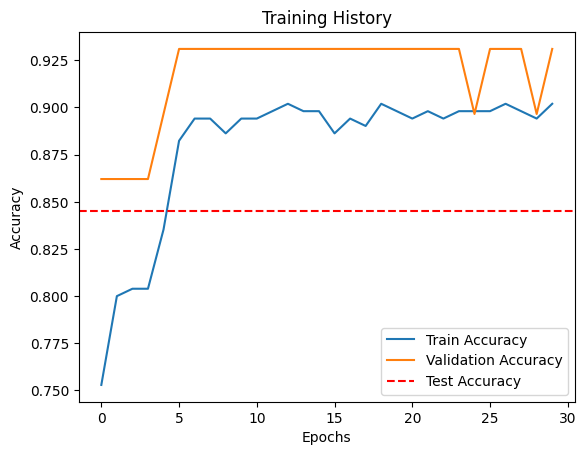

In [138]:
# Building and training the LSTM Model using Tensorflow with Keras

import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

def create_sequences(features,target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        seq = features[i:i + seq_length]
        label = target[i + seq_length]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

SEQ_LENGTH = 10
FEATURES = ['Temperature', 'Month', 'Past_Flu_Occurrences']
target = 'Flu_Status'

X = data[FEATURES].values
y = data[target].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_sequences, y_sequences = create_sequences(X_scaled,y, SEQ_LENGTH)

X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=7)

model = Sequential()
model.add(Input(shape=(SEQ_LENGTH, len(FEATURES))))
model.add(LSTM(70, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"\nTest Accuracy: {accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

In [140]:
monthly_stats = data.groupby('Month')['Past_Flu_Occurrences'].agg(['mean', 'std']).reset_index()
monthly_stats.columns = ['Month', 'Mean_Flu_Occurrences', 'Std_Flu_Occurrences']
monthly_stats.set_index('Month',inplace=True)

month= int(input('Please enter a month (numerical): '))
months = [month]*10
temp=int(input('Please enter a temperature in celsius: '))
temperatures_array = np.append(temp,(np.random.normal(temp,3,9)))
temperatures=[]
for i in temperatures_array:
    temperatures.append(int(i))
if month in monthly_stats.index:
    mean_flu = monthly_stats.loc[month, 'Mean_Flu_Occurrences']
    std_flu = monthly_stats.loc[month, 'Std_Flu_Occurrences']
else:
    raise ValueError(f"Month {month} is not in the data")

past_flu_occurrences = np.random.normal(mean_flu,std_flu,10)

sequence_df = pd.DataFrame({
    'Temperature': temperatures,
    'Month': months,
    'Past_Flu_Occurrences': past_flu_occurrences
})

scaled_sequence = scaler.fit_transform(sequence_df)
new_scaled = scaled_sequence[-10:]
new_scaled = np.reshape(new_scaled, (1, 10, 3))
prediction=model.predict(np.array(new_scaled))
flu_status=int(prediction[0][0]>=0.5)
if flu_status == 1:
    print('Model believes the patient has the flu') 
else:
    print('The model has not flagged the patient for having the flu')
print(f'\nThe model believes there is a {100*prediction[0][0]:.2f}% chance that they have the flu')

Please enter a month (numerical):  4
Please enter a temperature in celsius:  24


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The model has not flagged the patient for having the flu

The model believes there is a 19.34% chance that they have the flu
